In [1]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

# ML packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report

https://www.kaggle.com/datasets/vipullrathod/fish-market

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipullrathod/fish-market")

print("Path to dataset files:", path)

# Note this downloads three files. We will use the second one.
file = path + '/' + os.listdir(path)[0]
df = pd.read_csv(file)
df

100%|██████████| 2.38k/2.38k [00:00<00:00, 1.70MB/s]

Extracting files...
Path to dataset files: C:\Users\josee\.cache\kagglehub\datasets\vipullrathod\fish-market\versions\1


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


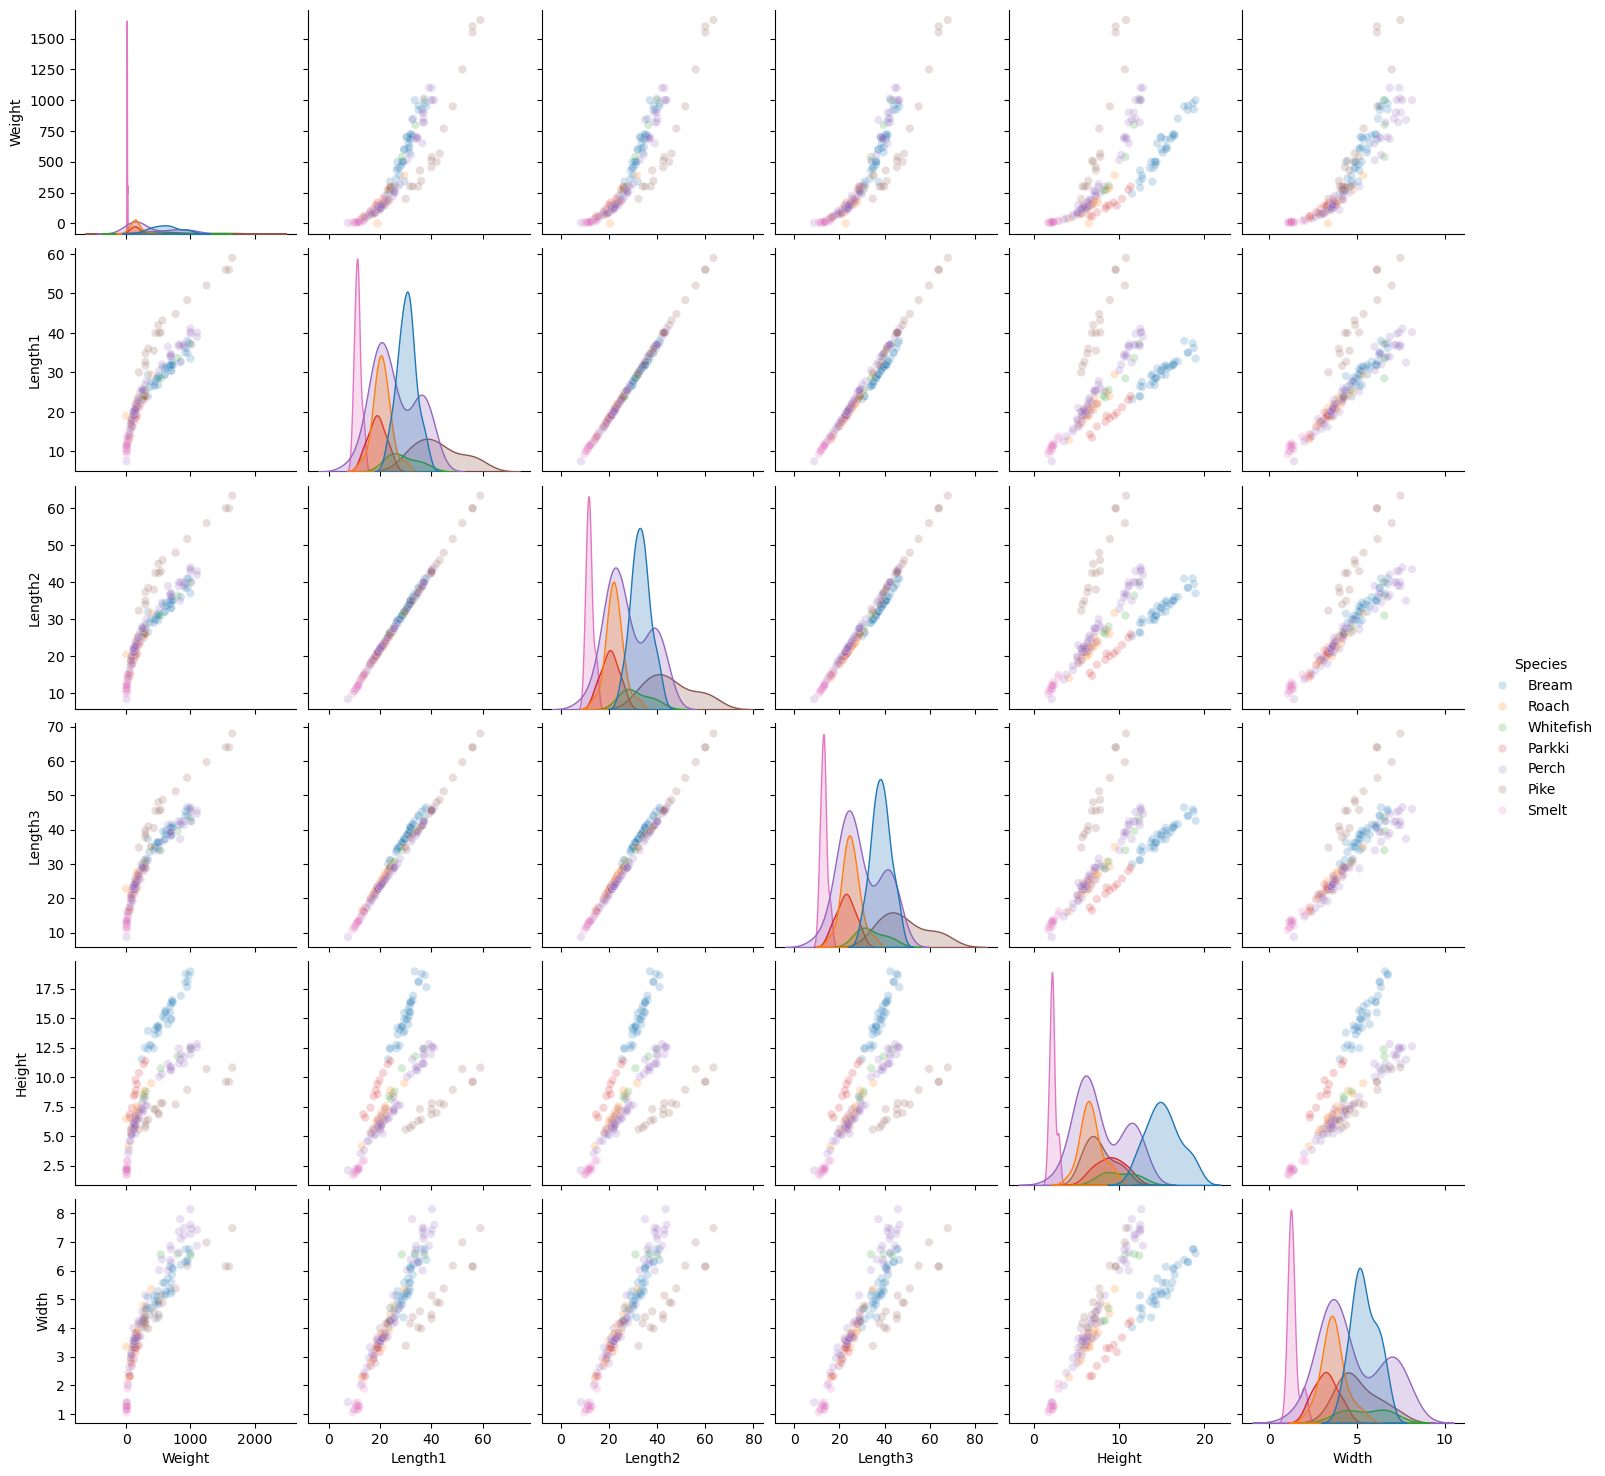

In [5]:
sns.pairplot(df, diag_kind="kde", plot_kws={"alpha": 0.2}, hue='Species')
plt.show()

In [6]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [10]:
df_full = pd.merge(df,pd.get_dummies(df['Species'],dtype=int),on=df.index)
df_full

,key_0,Species,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [11]:
df_full.keys()

Index(['key_0', 'Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width', 'Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt',
       'Whitefish'],
      dtype='object')

In [16]:
# Test Train Split
x_cols = ['Length1','Length2','Length3','Height','Width','Bream','Parkki','Perch','Pike','Roach','Smelt','Whitefish']
y_cols = ['Weight']

X = df_full[x_cols]
y = df_full[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
# pre-processing before training model
poly = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

linreg = LinearRegression()
linreg.fit(X_train_poly,y_train)

LinearRegression()

In [35]:
poly.get_feature_names_out(X_train.columns)

array(['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Bream',
       'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish',
       'Length1^2', 'Length1 Length2', 'Length1 Length3',
       'Length1 Height', 'Length1 Width', 'Length1 Bream',
       'Length1 Parkki', 'Length1 Perch', 'Length1 Pike', 'Length1 Roach',
       'Length1 Smelt', 'Length1 Whitefish', 'Length2^2',
       'Length2 Length3', 'Length2 Height', 'Length2 Width',
       'Length2 Bream', 'Length2 Parkki', 'Length2 Perch', 'Length2 Pike',
       'Length2 Roach', 'Length2 Smelt', 'Length2 Whitefish', 'Length3^2',
       'Length3 Height', 'Length3 Width', 'Length3 Bream',
       'Length3 Parkki', 'Length3 Perch', 'Length3 Pike', 'Length3 Roach',
       'Length3 Smelt', 'Length3 Whitefish', 'Height^2', 'Height Width',
       'Height Bream', 'Height Parkki', 'Height Perch', 'Height Pike',
       'Height Roach', 'Height Smelt', 'Height Whitefish', 'Width^2',
       'Width Bream', 'Width Parkki', 'Width Perch', 'Widt

In [37]:
# evaluate prediction to training data (POLY)
y_pred = linreg.predict(X_train_poly)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print(mse)
print(r2)

1090.6028328875902
0.9911281329082593


In [39]:
# evaluate prediction to testing data (POLY)
y_pred = linreg.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(r2)

6210.482832725624
0.9563377814183718


**Logistic Regression**

In [46]:
df['Bream'] = df['Species'].apply(lambda x: 1 if x=='Bream' else 0)
df

,Species,Weight,Length1,Length2,Length3,Height,Width,Bream
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1
...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,0
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,0
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,0
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,0


In [47]:
# Test Train Split
x_cols = ['Length1','Length2','Length3','Height','Width','Weight']
y_cols = ['Bream']

X = df_full[x_cols]
y = df_full[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
# pre-processing before training model
poly = PolynomialFeatures(degree=1,include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_poly,y_train)

C:\Users\josee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\josee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [51]:
y_pred = logreg.predict(X_train)
accuracy_score(y_train,y_pred)

C:\Users\josee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



1.0